# Makara: Makanan Khas Nusantara
is an app that programmed to identify and classify a traditional food from Indonesia. In this coding we use 7 types of Indonesian food such as Bika Ambon, Kerak Telor, Martabak Manis, Martabak Telor, Papeda, Rendang, and lastly Seblak.

In [ ]:
!gdown 1BOenc8e-p3nTCeXxEPUTYzcqKZqnpuOt

Downloading...
From: https://drive.google.com/uc?id=1BOenc8e-p3nTCeXxEPUTYzcqKZqnpuOt
To: /content/makara.zip
100% 642M/642M [00:06<00:00, 101MB/s] 


In [ ]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [ ]:
# Mengimpor modul os dan zipfile untuk manajemen file dan ekstraksi arsip.
import os
import zipfile

local_zip = './makara.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/dataset')
zip_ref.close()

base_dir = 'tmp/dataset/makara/'

In [ ]:
# Mendefinisikan path ke direktori pelatihan untuk berbagai kelas makanan.

train_bikbon_dir = os.path.join(base_dir, 'bika ambon')
train_kelor_dir = os.path.join(base_dir, 'kerak telor')
train_molen_dir = os.path.join(base_dir, 'molen')
train_nasgor_dir = os.path.join(base_dir, 'nasi goreng')
train_papeda_dir = os.path.join(base_dir, 'papeda maluku')
train_sate_dir = os.path.join(base_dir, 'sate padang')
train_seblak_dir = os.path.join(base_dir, 'seblak')

In [ ]:
# Mendapatkan daftar nama file dari direktori pelatihan untuk setiap kelas makanan.

train_bikbon_names = os.listdir(train_bikbon_dir)
print(f'TRAIN SET BIKA AMBON: {train_bikbon_names[:10]}')

train_kelor_names = os.listdir(train_kelor_dir)
print(f'TRAIN SET KERAK TELOR: {train_kelor_names[:10]}')

train_molen_names = os.listdir(train_molen_dir)
print(f'TRAIN SET MOLEN: {train_molen_names[:10]}')

train_nasgor_names = os.listdir(train_nasgor_dir)
print(f'TRAIN SET NASI GORENG: {train_nasgor_names[:10]}')

train_papeda_names = os.listdir(train_papeda_dir)
print(f'TRAIN SET PAPEDA: {train_papeda_names[:10]}')

train_sate_names = os.listdir(train_sate_dir)
print(f'TRAIN SET SATE PADANG: {train_sate_names[:10]}')

train_seblak_names = os.listdir(train_seblak_dir)
print(f'TRAIN SET SEBLAK: {train_seblak_names[:10]}')

TRAIN SET BIKA AMBON: ['Image_64.jpg', 'Image_240.jpg', 'Image_23.jpg', 'Image_128.jpg', 'Image_95.jpg', 'Image_26.jpg', 'Image_30.jpg', 'Image_13.jpg', 'Image_1.jpg', 'Image_200.jpg']
TRAIN SET KERAK TELOR: ['Image_17.jpg', 'Image_23.jpg', 'Image_95.jpg', 'Image_26.jpg', 'Image_1.jpg', 'Image_50.jpg', 'Image_124.jpg', 'Image_127.jpg', 'Image_25.jpg', 'Image_14.jpg']
TRAIN SET MOLEN: ['IMG_3138.jpg', 'IMG_3073.jpg', 'IMG_2981.jpg', 'IMG_3192.jpg', 'IMG_3040.jpg', 'Image_30.jpg', 'IMG_3116.jpg', 'IMG_3037.jpg', 'Image_1.jpg', 'IMG_3066.jpg']
TRAIN SET NASI GORENG: ['IMG_3253.jpg', 'Image_23.jpg', 'IMG_3267.jpg', 'IMG_3210.jpg', 'IMG_3271.jpg', 'Image_26.jpg', 'Image_30.jpg', 'Image_13.jpg', 'Image_1.jpg', 'nasgor (18).jpg']
TRAIN SET PAPEDA: ['Image_248.jpg', 'Image_128.jpg', 'Image_26.jpg', 'Image_30.jpg', 'Image_13.jpg', 'Image_1.jpg', 'Image_145.jpg', 'Image_75.jpg', 'Image_50.jpg', 'Image_201.jpg']
TRAIN SET SATE PADANG: ['padang (20).jpg', 'Image_23.jpg', 'IMG_3403.jpg', 'Image_26.

In [ ]:
# Menampilkan total jumlah gambar pelatihan untuk setiap kelas makanan.

print(f'total training bika ambon images: {len(os.listdir(train_bikbon_dir))}')
print(f'total training kerak telor images: {len(os.listdir(train_kelor_dir))}')
print(f'total training molen images: {len(os.listdir(train_molen_dir))}')
print(f'total training nasi goreng images: {len(os.listdir(train_nasgor_dir))}')
print(f'total training papeda maluku images: {len(os.listdir(train_papeda_dir))}')
print(f'total training sate padang images: {len(os.listdir(train_sate_dir))}')
print(f'total training seblak images: {len(os.listdir(train_seblak_dir))}')

total training bika ambon images: 160
total training kerak telor images: 77
total training molen images: 255
total training nasi goreng images: 196
total training papeda maluku images: 75
total training sate padang images: 163
total training seblak images: 161


In [ ]:
# Menggunakan %matplotlib inline untuk menampilkan plot gambar di dalam notebook.
%matplotlib inline

# Mengimpor library matplotlib untuk plotting gambar.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Menentukan jumlah baris dan kolom untuk tata letak plot gambar.
nrows = 14
ncols = 14

# Menentukan indeks gambar awal.
pic_index = 0 # Atau nilai lain yang sesuai dengan jumlah gambar dalam setiap kelas.


In [ ]:
# Mengatur ukuran gambar plot sesuai dengan jumlah baris dan kolom yang telah ditentukan sebelumnya.
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

# Menambahkan indeks gambar untuk melihat gambar berikutnya pada plot.
pic_index += 14

# Mengumpulkan path gambar untuk kelas-kelas makanan tertentu dari dataset pelatihan.

next_bikbon_pix = [os.path.join(train_bikbon_dir, fname)
                for fname in train_bikbon_names[pic_index-8:pic_index]]

next_kelor_pix = [os.path.join(train_kelor_dir, fname)
                for fname in train_kelor_names[pic_index-8:pic_index]]

next_molen_pix = [os.path.join(train_molen_dir, fname)
                for fname in train_molen_names[pic_index-8:pic_index]]

next_nasgor_pix = [os.path.join(train_nasgor_dir, fname)
                for fname in train_nasgor_names[pic_index-8:pic_index]]

next_papeda_pix = [os.path.join(train_papeda_dir, fname)
                for fname in train_papeda_names[pic_index-8:pic_index]]

next_sate_pix = [os.path.join(train_sate_dir, fname)
                for fname in train_sate_names[pic_index-8:pic_index]]

next_seblak_pix = [os.path.join(train_seblak_dir, fname)
                for fname in train_seblak_names[pic_index-8:pic_index]]

# Menampilkan gambar-gambar berikutnya pada plot.
for i, img_path in enumerate(next_bikbon_pix+next_kelor_pix+next_molen_pix+
                             next_nasgor_pix+next_papeda_pix+next_sate_pix+next_seblak_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

# Menampilkan plot gambar.
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
# pre_trained_model.summary()
# plot_model(pre_trained_model, to_file='inception_v3_model.png', show_shapes=False, show_layer_names=True)

In [ ]:
# last_layer = pre_trained_model.get_layer('mixed7')
# last_output = last_layer.output

In [ ]:
# class myCallback(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs={}):
#         if(logs.get('acc') > 0.95 and logs.get('val_acc') > 0.95):
#             print("\nStop Training Model!")
#             self.model.stop_training = True

In [ ]:
# callback = myCallback()

In [ ]:
model = Sequential([
    layers.Rescaling(1./255., input_shape=(224,224,3)),
    layers.RandomFlip(mode='horizontal'),
    layers.RandomRotation(0.2),
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(7, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
# Mengimpor TensorFlow dan modul image_dataset_from_directory untuk membuat dataset dari direktori gambar.

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# Membuat dataset pelatihan menggunakan image_dataset_from_directory.
training = tf.keras.utils.image_dataset_from_directory(
        base_dir,
        color_mode='rgb',
        batch_size=64,
        image_size=(224, 224),
        shuffle=True,
        label_mode='categorical',
        subset = 'training',
        validation_split=0.2,
        seed=42
    )
validation = tf.keras.utils.image_dataset_from_directory(
        base_dir,
        color_mode='rgb',
        batch_size=64,
        image_size=(224, 224),
        shuffle=True,
        label_mode='categorical',
        subset = 'validation',
        validation_split=0.2,
        seed=42
    )

Found 1087 files belonging to 7 classes.
Using 870 files for training.
Found 1087 files belonging to 7 classes.
Using 217 files for validation.


In [ ]:
# model.summary()
# plot_model(model, to_file='inception_v3_with_dense_layers_model.png', show_shapes=False, show_layer_names=True)

In [ ]:
# callback = myCallback()
history = model.fit(training,
                    validation_data=validation,
                    epochs=10,
                    verbose=1)

Epoch 1/10
14/14 [==============================] - 26s 964ms/step - loss: 0.0283 - accuracy: 0.9943 - val_loss: 0.1462 - val_accuracy: 0.9631
Epoch 2/10
14/14 [==============================] - 23s 943ms/step - loss: 0.0334 - accuracy: 0.9920 - val_loss: 0.1317 - val_accuracy: 0.9585
Epoch 3/10
14/14 [==============================] - 24s 888ms/step - loss: 0.0357 - accuracy: 0.9851 - val_loss: 0.1598 - val_accuracy: 0.9493
Epoch 4/10
14/14 [==============================] - 25s 994ms/step - loss: 0.0257 - accuracy: 0.9931 - val_loss: 0.1623 - val_accuracy: 0.9401
Epoch 5/10
14/14 [==============================] - 24s 902ms/step - loss: 0.0266 - accuracy: 0.9954 - val_loss: 0.1258 - val_accuracy: 0.9631
Epoch 6/10
14/14 [==============================] - 25s 949ms/step - loss: 0.0409 - accuracy: 0.9862 - val_loss: 0.1336 - val_accuracy: 0.9677
Epoch 7/10
14/14 [==============================] - 27s 1s/step - loss: 0.0310 - accuracy: 0.9897 - val_loss: 0.1488 - val_accuracy: 0.9585
Ep

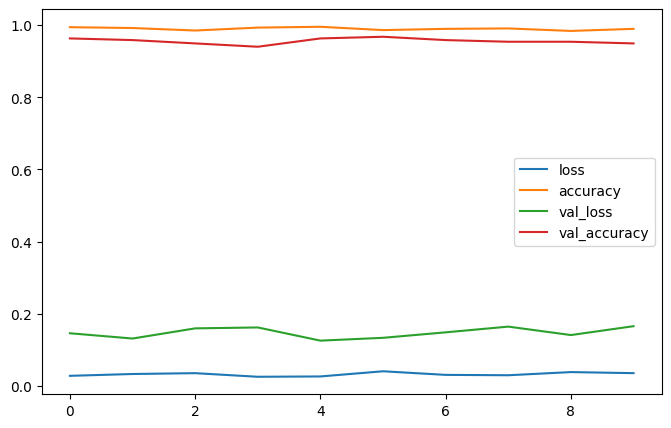

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  print(fn)

  print('Bika Ambon', '{:.4f}'.format(classes[0,0]))
  print('Kerak Telor', '{:.4f}'.format(classes[0,1]))
  print('Molen', '{:.4f}'.format(classes[0,2]))
  print('Nasi Goreng', '{:.4f}'.format(classes[0,3]))
  print('Papeda Maluku', '{:.4f}'.format(classes[0,4]))
  print('Sate Padang', '{:.4f}'.format(classes[0,5]))
  print('Seblak', '{:.4f}'.format(classes[0,6]))

Saving nasgor 3.jpeg to nasgor 3.jpeg
Saving nasgor 2.webp to nasgor 2.webp
Saving nasgor.jpg to nasgor.jpg
Saving molen3.jpg to molen3.jpg
Saving molen 2.webp to molen 2.webp
Saving molen.JPG to molen.JPG
Saving satepadang3.webp to satepadang3.webp
Saving satepadang2.jpg to satepadang2.jpg
Saving sate padang.jpeg to sate padang.jpeg
1/1 [==============================] - 2s 2s/step
nasgor 3.jpeg
Bika Ambon 0.0027
Kerak Telor 0.0003
Molen 0.0023
Nasi Goreng 0.6637
Papeda Maluku 0.0001
Sate Padang 0.0006
Seblak 0.3303
1/1 [==============================] - 0s 56ms/step
nasgor 2.webp
Bika Ambon 0.0000
Kerak Telor 0.0000
Molen 0.0000
Nasi Goreng 1.0000
Papeda Maluku 0.0000
Sate Padang 0.0000
Seblak 0.0000
1/1 [==============================] - 0s 42ms/step
nasgor.jpg
Bika Ambon 0.0000
Kerak Telor 0.0000
Molen 0.0000
Nasi Goreng 0.9938
Papeda Maluku 0.0021
Sate Padang 0.0041
Seblak 0.0000
1/1 [==============================] - 0s 42ms/step
molen3.jpg
Bika Ambon 0.0000
Kerak Telor 0.0000
Mo

In [ ]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
model = Sequential([
    layers.Rescaling(1./255., input_shape=(224,224,3)),
    layers.RandomFlip(mode='horizontal'),
    layers.RandomRotation(0.2),
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_rotation_1 (RandomR  (None, 224, 224, 3)       0         
 otation)                                                        
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Mengimpor TensorFlow dan modul image_dataset_from_directory untuk membuat dataset dari direktori gambar.

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# Membuat dataset pelatihan menggunakan image_dataset_from_directory.
training = tf.keras.utils.image_dataset_from_directory(
        base_dir,
        color_mode='rgb',
        batch_size=128,
        image_size=(224, 224),
        shuffle=True,
        label_mode='categorical',
        subset = 'training',
        validation_split=0.2,
        seed=42
    )

# Membuat dataset validasi menggunakan image_dataset_from_directory.
validation = tf.keras.utils.image_dataset_from_directory(
        base_dir,
        color_mode='rgb',
        batch_size=32,
        image_size=(224, 224),
        shuffle=True,
        label_mode='categorical',
        subset = 'validation',
        validation_split=0.2,
        seed=42
    )

Found 1087 files belonging to 7 classes.
Using 870 files for training.
Found 1087 files belonging to 7 classes.
Using 217 files for validation.


In [ ]:
history = model.fit(
    training,
    steps_per_epoch=7,
    validation_data=validation,
    validation_steps=7,
    epochs=10,
    verbose=2
)

Epoch 1/10
7/7 - 32s - loss: 19.3889 - accuracy: 0.4103 - val_loss: 10.2419 - val_accuracy: 0.6037 - 32s/epoch - 5s/step
Epoch 2/10
7/7 - 25s - loss: 5.1619 - accuracy: 0.6989 - val_loss: 1.5661 - val_accuracy: 0.8295 - 25s/epoch - 4s/step
Epoch 3/10
7/7 - 25s - loss: 1.2313 - accuracy: 0.8414 - val_loss: 1.4007 - val_accuracy: 0.8433 - 25s/epoch - 4s/step
Epoch 4/10
7/7 - 24s - loss: 0.6541 - accuracy: 0.8839 - val_loss: 0.6200 - val_accuracy: 0.8710 - 24s/epoch - 3s/step
Epoch 5/10
7/7 - 25s - loss: 0.2368 - accuracy: 0.9253 - val_loss: 0.3606 - val_accuracy: 0.8756 - 25s/epoch - 4s/step
Epoch 6/10
7/7 - 24s - loss: 0.1737 - accuracy: 0.9379 - val_loss: 0.2942 - val_accuracy: 0.8894 - 24s/epoch - 3s/step
Epoch 7/10
7/7 - 24s - loss: 0.1631 - accuracy: 0.9448 - val_loss: 0.2876 - val_accuracy: 0.8802 - 24s/epoch - 3s/step
Epoch 8/10
7/7 - 25s - loss: 0.1258 - accuracy: 0.9598 - val_loss: 0.3722 - val_accuracy: 0.8894 - 25s/epoch - 4s/step
Epoch 9/10
7/7 - 26s - loss: 0.1169 - accuracy

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(224, 224))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  print(fn)

  print('Bika Ambon', '{:.4f}'.format(classes[0,0]))
  print('Kerak Telor', '{:.4f}'.format(classes[0,1]))
  print('Molen', '{:.4f}'.format(classes[0,2]))
  print('Nasi Goreng', '{:.4f}'.format(classes[0,3]))
  print('Papeda Maluku', '{:.4f}'.format(classes[0,4]))
  print('Sate Padang', '{:.4f}'.format(classes[0,5]))
  print('Seblak', '{:.4f}'.format(classes[0,6]))

Saving nasgor 3.jpeg to nasgor 3 (1).jpeg
Saving nasgor 2.webp to nasgor 2 (1).webp
Saving nasgor.jpg to nasgor (1).jpg
Saving molen3.jpg to molen3 (1).jpg
Saving molen 2.webp to molen 2 (1).webp
Saving molen.JPG to molen (1).JPG
Saving satepadang3.webp to satepadang3 (1).webp
Saving satepadang2.jpg to satepadang2 (1).jpg
Saving sate padang.jpeg to sate padang (1).jpeg
1/1 [==============================] - 1s 1s/step
nasgor 3 (1).jpeg
Bika Ambon 0.0000
Kerak Telor 0.0000
Molen 0.0000
Nasi Goreng 0.3202
Papeda Maluku 0.0000
Sate Padang 0.0000
Seblak 0.6798
1/1 [==============================] - 0s 23ms/step
nasgor 2 (1).webp
Bika Ambon 0.0000
Kerak Telor 0.0000
Molen 0.0000
Nasi Goreng 1.0000
Papeda Maluku 0.0000
Sate Padang 0.0000
Seblak 0.0000
1/1 [==============================] - 0s 22ms/step
nasgor (1).jpg
Bika Ambon 0.0000
Kerak Telor 0.0000
Molen 0.0000
Nasi Goreng 0.9931
Papeda Maluku 0.0069
Sate Padang 0.0000
Seblak 0.0000
1/1 [==============================] - 0s 25ms/step
mo

In [ ]:
model.save('makara.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
